<a href="https://colab.research.google.com/github/Amarjeet-1998/Python_Practice2022/blob/main/Algeian_forest_fires_Data_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

In [44]:
warnings.filterwarnings('ignore')
%matplotlib inline


In [45]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [46]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [47]:
df.loc[118:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


## Remove extra rows and add a new column for region

In [48]:
df = df.drop(index=[123,124,122])
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


Adding one more columns regions Bejaia Region and sidi-Bel Abbes Region

In [49]:
# Make own Index as Index
# In this case default Index is exist
df.reset_index(inplace=True)

In [51]:
df.loc[:122,'Region']= '0'
df.loc[122:,'Region'] = '1'
df

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [52]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        243 non-null    int64 
 1   day          243 non-null    object
 2   month        243 non-null    object
 3   year         243 non-null    object
 4   Temperature  243 non-null    object
 5    RH          243 non-null    object
 6    Ws          243 non-null    object
 7   Rain         243 non-null    object
 8   FFMC         243 non-null    object
 9   DMC          243 non-null    object
 10  DC           243 non-null    object
 11  ISI          243 non-null    object
 12  BUI          243 non-null    object
 13  FWI          243 non-null    object
 14  Classes      242 non-null    object
 15  Region       243 non-null    object
dtypes: int64(1), object(15)
memory usage: 30.5+ KB


In [54]:
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [55]:
df['FFMC']= df['FFMC'].astype(float)

In [56]:
df['DMC'] = df['DMC'].astype(float)
df['Temperature'] = df['Temperature'].astype(float)
df['ISI']= df['ISI'].astype(float)

In [57]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [58]:
df.columns = df.columns.str.strip()

In [59]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [60]:
df['Rain'] = df['Rain'].astype(float)
df['Rain'].unique()

array([ 0. ,  1.3, 13.1,  2.5,  0.2,  1.2,  0.5,  3.1,  0.7,  0.6,  0.3,
        0.1,  0.4,  1. ,  1.4,  0.8, 16.8,  7.2, 10.1,  3.8,  0.9,  1.8,
        4.6,  8.3,  5.8,  4. ,  2. ,  4.7,  8.7,  4.5,  1.1,  1.7,  2.2,
        6. ,  1.9,  2.9,  4.1,  6.5,  4.4])

In [61]:
df['RH'] = df['RH'].astype(int)
df['Ws'] = df['Ws'].astype(int)

In [62]:
df['BUI'] = df['BUI'].astype(float)

In [63]:
df['FWI'] = df['FWI'].replace('fire   ','0')

In [64]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', '14.1', '9.1', '13', '17.3', '30',
       '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6', '12.7',
       '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3', '12.2',
       '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16', '19.4',
       '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4', '1

In [65]:
df['FWI'] = df['FWI'].astype(float)


In [66]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5', '37.8',
       

In [67]:
df['DC']= df['DC'].replace('14.6 9','14.69')

In [68]:
df['DC']= df['DC'].astype(float)

In [69]:
df.dtypes

index            int64
day             object
month           object
year            object
Temperature    float64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [70]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [71]:
df['Classes'] = df['Classes'].str.strip()

In [72]:
df['Classes'].mode()

0    fire
dtype: object

In [73]:
## fill na value
df['Classes'].fillna((df['Classes'].mode()[0]),inplace=True)

In [74]:
# droping the index columns
df= df.drop('index', axis=1)

In [75]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

All Null values are removed from the dataset

In [76]:
# showing the description information of dataset
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.172840,61.901235,15.518519,0.760905,77.973251,14.723457,49.457572,4.791358,16.721811,7.034568
std,3.641327,14.903495,2.806918,2.003528,14.304628,12.368735,47.644222,4.175287,14.206097,7.441338
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.450000,5.800000,14.445000,1.400000,6.050000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.300000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(8), int64(2), object(5)
memory usage: 28.6+ KB


In [86]:
# seprate columns for categorical and numerical columns
columns_numerical_feature = [columns for columns in df.columns if df[columns].dtypes !='object']
columns_numerical_feature

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [82]:
columns_categorical = [columns for columns in df.columns if df[columns].dtypes == 'object']

In [87]:
columns_categorical

['day', 'month', 'year', 'Classes', 'Region']

# visualization

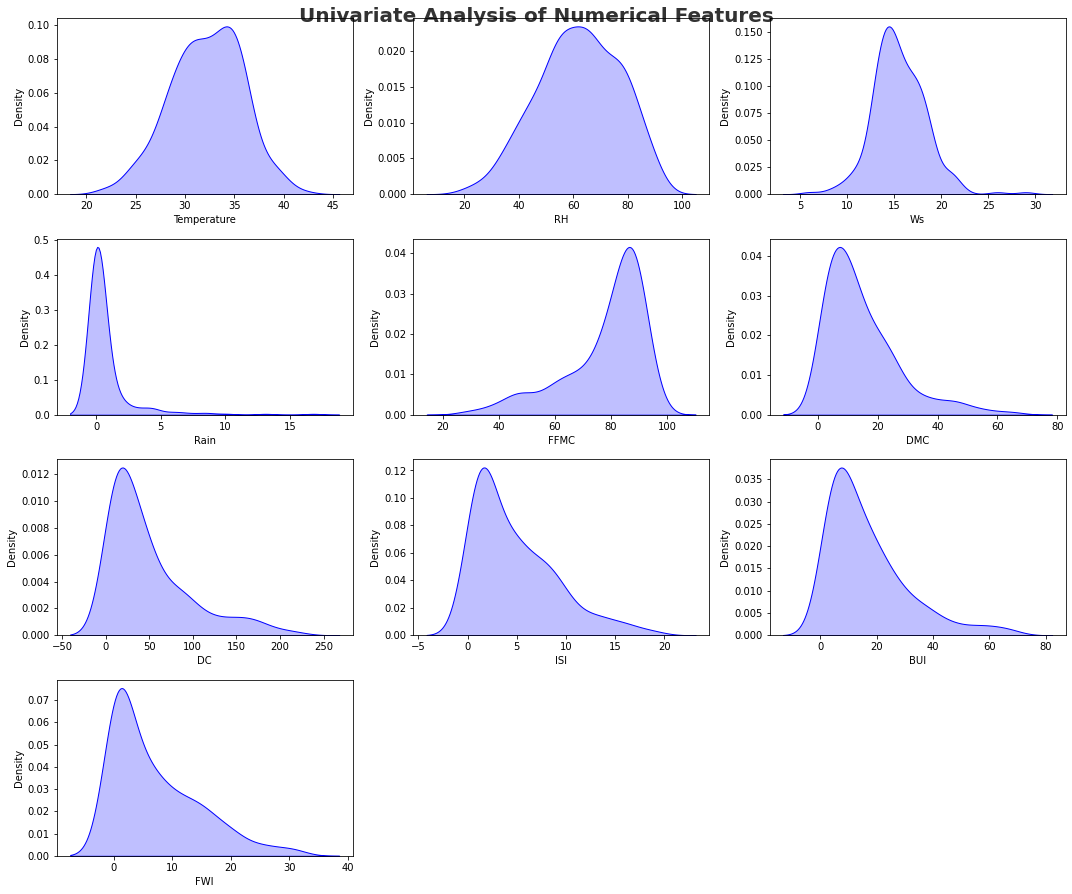

In [89]:
plt.figure(figsize =(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight ='bold', alpha = 0.8, y = 1.)

for i in range(0, len(columns_numerical_feature)):
  plt.subplot(5, 3, i+1)
  sns.kdeplot(x=df[columns_numerical_feature[i]], shade=True, color = 'b')
  plt.xlabel(columns_numerical_feature[i])
  plt.tight_layout()


### Attribute Information
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data
observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire
13. Region: 0 Signifies Bejaia region and 1 signifies Sidi Bel-abbes region
14. Fire: 0 indicstes fire and 1 indicates no fire


# Universal Analysis

The term univariate analysis refers to the analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [90]:
df[(list(df.columns)[1:])].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654829,-0.279276,-0.326794,0.680171,0.483884,0.370915,0.608617,0.456214,0.559184
RH,-0.654829,1.000000,0.240177,0.223216,-0.645312,-0.403774,-0.218678,-0.690076,-0.347081,-0.569115
Ws,-0.279276,0.240177,1.000000,0.170562,-0.172025,-0.006351,0.072150,0.010151,0.024856,0.024204
Rain,-0.326794,0.223216,0.170562,1.000000,-0.546607,-0.289251,-0.297374,-0.347950,-0.299885,-0.323358
FFMC,0.680171,-0.645312,-0.172025,-0.546607,1.000000,0.600304,0.501702,0.738475,0.587514,0.684712
DMC,0.483884,-0.403774,-0.006351,-0.289251,0.600304,1.000000,0.874950,0.673170,0.982002,0.874319
DC,0.370915,-0.218678,0.072150,-0.297374,0.501702,0.874950,1.000000,0.497153,0.941729,0.739340
ISI,0.608617,-0.690076,0.010151,-0.347950,0.738475,0.673170,0.497153,1.000000,0.634418,0.907123
BUI,0.456214,-0.347081,0.024856,-0.299885,0.587514,0.982002,0.941729,0.634418,1.000000,0.857251
FWI,0.559184,-0.569115,0.024204,-0.323358,0.684712,0.874319,0.739340,0.907123,0.857251,1.000000


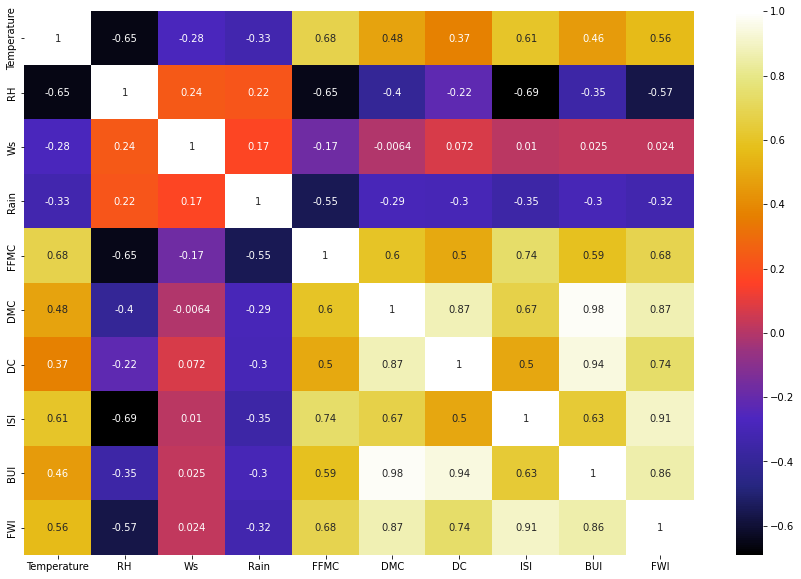

In [91]:
plt.figure(figsize =(15, 10))
sns.heatmap(df.corr(), cmap='CMRmap', annot=True)
plt.show()

### Report


*   RH is negatively corelated with Temperature, FFMC and ISI
*   Rain is negatively correlated with Temperature and FFMC, DMC, ISI and BUI



#### Checking Null Values

In [92]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

There is no null values